In [1]:
# import suitable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data set
data = pd.read_excel('H:/data/cart.xlsx')
data

,S.no,sall,exp,age
0,1,low,high,midd
1,2,high,low,midd
2,3,midd,low,low
3,4,high,midd,high
4,5,high,low,high
5,6,low,midd,low
6,7,high,midd,high
7,8,midd,midd,midd
8,9,high,low,low
9,10,low,midd,high


In [3]:
# Encoded givn data set
d = {'low':0,'midd':1,'high':2}
data['sall'] = data['sall'].map(d)
data['age'] = data['age'].map(d)
data['exp'] = data['exp'].map(d)

In [4]:
feature_col = ['exp','age']
x = data[['exp','age']]
y = data['sall']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C329EBB48>,
      dtype=object)

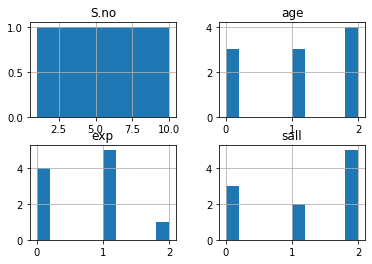

In [5]:
data.hist()

In [6]:
# import decision tree classifier library
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Fit the algorithms
clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot

G:\aacoda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


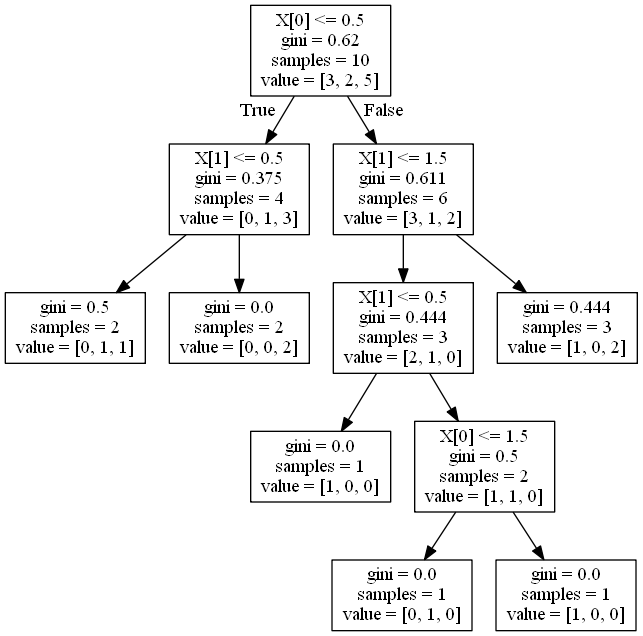

In [9]:
# Display GRaphical images of the decision 
# Here is features values are "exp",and "age" or vecterde value is "Sall"
dot_data = StringIO()
export_graphviz(clf,out_file= dot_data)
graph =  pydot.graph_from_dot_data(dot_data.getvalue())
img = Image(graph[0].create_png())
img

In [10]:
# cross validation of the given data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

from sklearn import metrics as m
print("Accuracy :",m.accuracy_score(y_test,predict))
print("Classification Report : \n",m.classification_report(y_test,predict))
print("Confusion Matrix :",m.confusion_matrix(y_test,predict))

Accuracy : 0.3333333333333333
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.50      1.00      0.67         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3

Confusion Matrix : [[0 1 1]
 [0 0 0]
 [0 0 1]]


G:\aacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\aacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
